# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
#Import necessary libraries
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# DATA OVERVIEW

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#types of shows
df.type.unique()

array(['TV Show', 'Movie'], dtype=object)

In [ ]:
#types of ratings
df.rating.unique()


array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

# NULL VALUE TREATMENT




*  1. RATING & COUNTRY - Replacing nulls with mode

*  2. CAST- Replacing nulls with 'unknown'.

*  3. DATE - there are few missing values for date column. so, lets drop missing value rows.


*  4. DIRECTOR - Director column has more then 30% null values so we will not use it for our model but will keep it for EDA - Replacing nulls with 'unknown'.





In [ ]:
#Calculating the percentage of NULL of values in each column
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
director,2389,30.679337
cast,718,9.220496
country,507,6.510851
date_added,10,0.128419
rating,7,0.089893
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000
duration,0,0.000000


In [ ]:
#Replacing missing values in 'director' column with value 'unknown'
df['director'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'cast' column with value 'unknown'
df['cast'].replace(np.nan, "unknown",inplace  = True)

#Replacing missing values in 'country' column with mode
df['country']= df['country'].fillna(df['country'].mode()[0])


#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Dropping the null values in 'date_added'
df = df[df['date_added'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


No more null values left

# EDA

In [ ]:
#check duplicate entries
len(df[df.duplicated()])

0

No duplicates found in the data

**TYPE OF CONTENT**

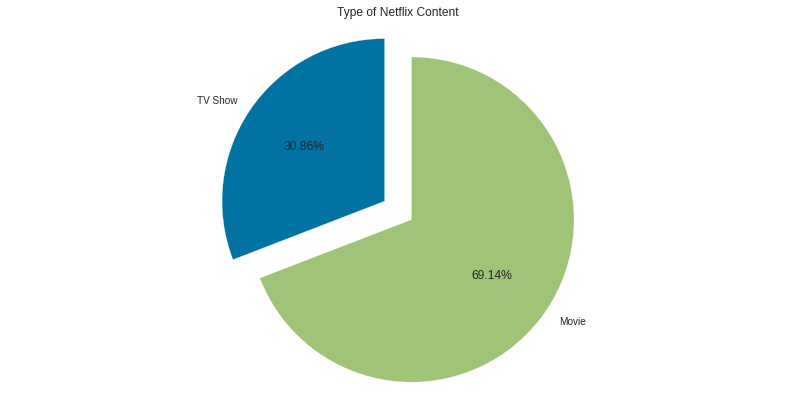

In [ ]:
#plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

There are about 70% movies and 30% TV shows on Netflix.

**TOP 10 COUNTRIES**

In [ ]:
#FEATURE ENGINEERING - Creating a new feature 'main_Country'
df['main_country']= df['country'].apply(lambda x: x.split(",")[0])

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_country
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States


Text(0, 0.5, 'Country Name')

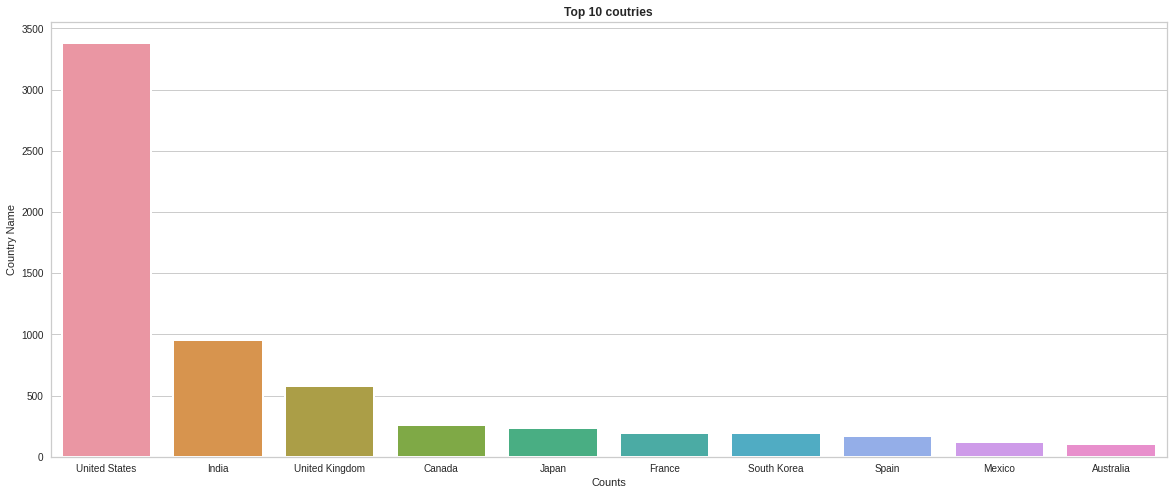

In [ ]:
# Top 10 countries on Netflix
plt.figure(figsize=(20,8))
ax=sns.countplot(x='main_country',lw=2,data=df,
              order=df['main_country'].value_counts().index[0:10])

plt.title('Top 10 coutries',fontweight="bold")
plt.xlabel('Counts')
plt.ylabel('Country Name')

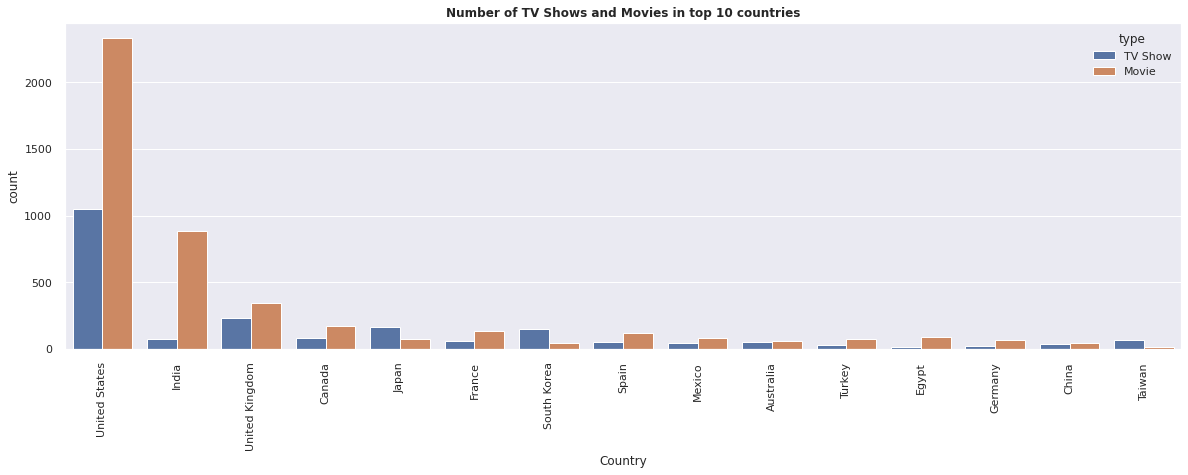

In [ ]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(20,6))
ax=sns.countplot(x="main_country",data= df,hue= "type",order = df['main_country'].value_counts().index[0:15])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in top 10 countries",fontweight="bold")
plt.show()

Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively.

**TOP 10 DIRECTORS**

In [ ]:
#creating copy for plot
direc=df.copy()
#removing unknown 
direc=direc[df['director']!='unknown']

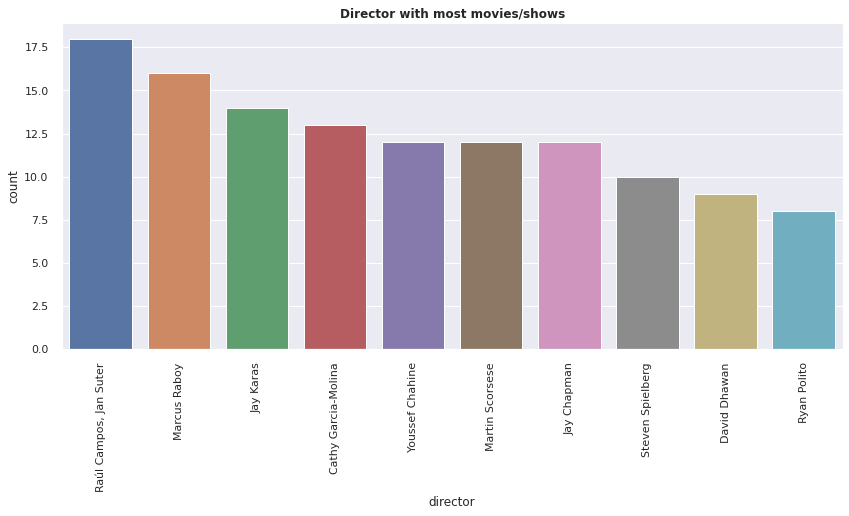

In [ ]:
#plot for top 10 director

plt.figure(figsize = (14,6))
sns.countplot(x='director',data=direc,order=direc.director.value_counts().head(10).index)
plt.title('Director with most movies/shows',fontweight="bold")
plt.xticks(rotation = 90)
plt.show()


Raul Campos and Jan Sulter collectively have the most content on Netflix.

**TOP 10 ACTORS**

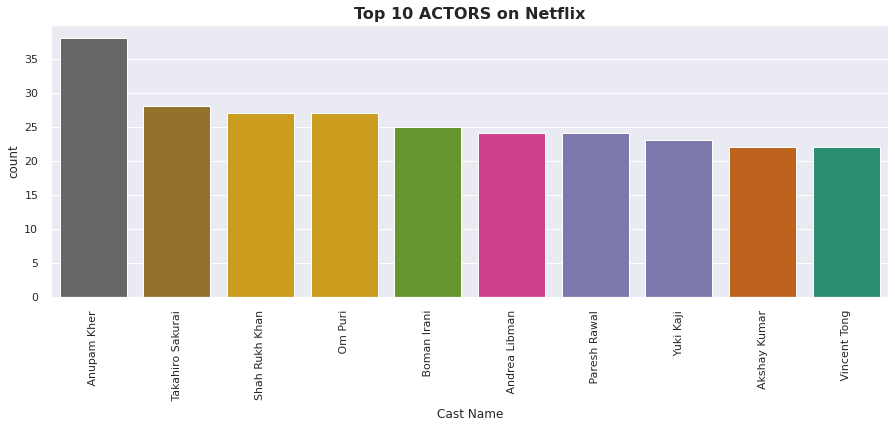

In [ ]:
#getting plot for top actors

#splitting into list
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []

#count movies for each actor
for i in df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top 10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xlabel('Cast Name')
plt.xticks(rotation=90)
plt.show()

Anupam Kher Have the most number of films on Netflix.

**TOP 10 GENRES**

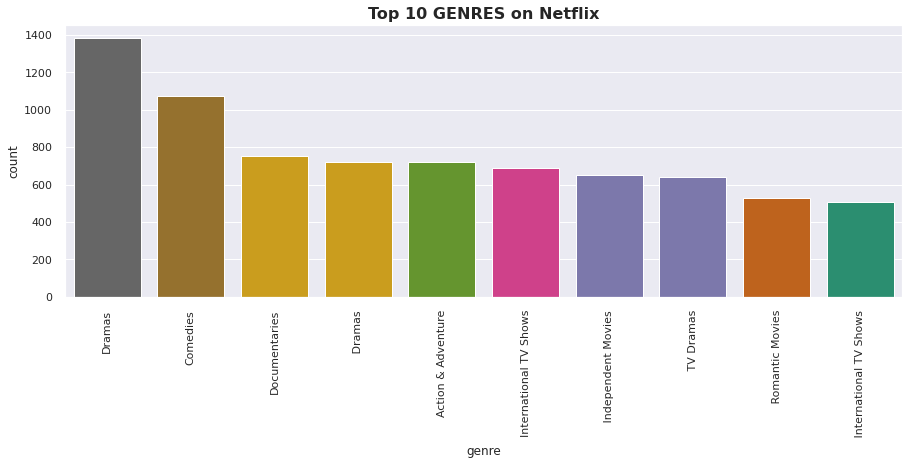

In [ ]:
#Top 10 genres plot

#splitting into list
df['listed_in'] = df['listed_in'].apply(lambda x :  x.split(',')) 
genre_count = []
#count genre for each movie
for i in df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular genre followed by comedy.

In [ ]:
#Getting Movies and TV show records in seperate dataframes
movies_df= df[df['type']=='Movie']
tvshow_df= df[df['type']=='TV Show']
movies_df.shape

(5377, 14)

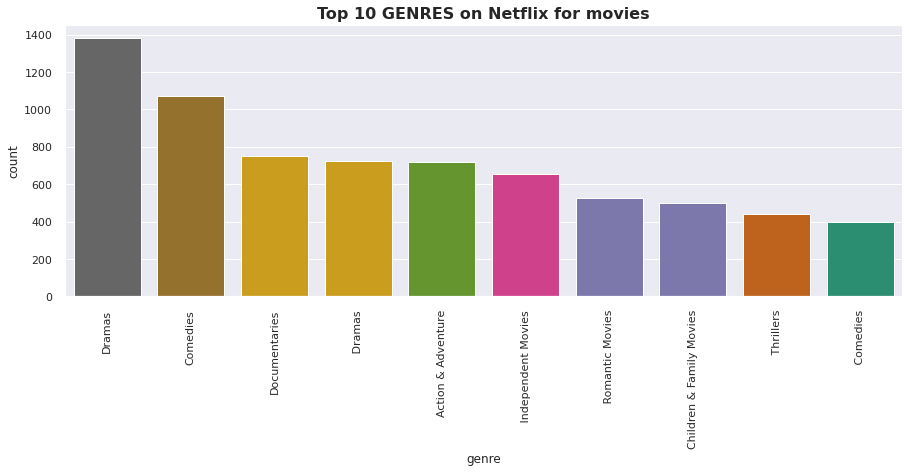

In [ ]:
#Top 10 genres for movies
genre_count = []
for i in movies_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix for movies",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular genre followed by comedy for movies.

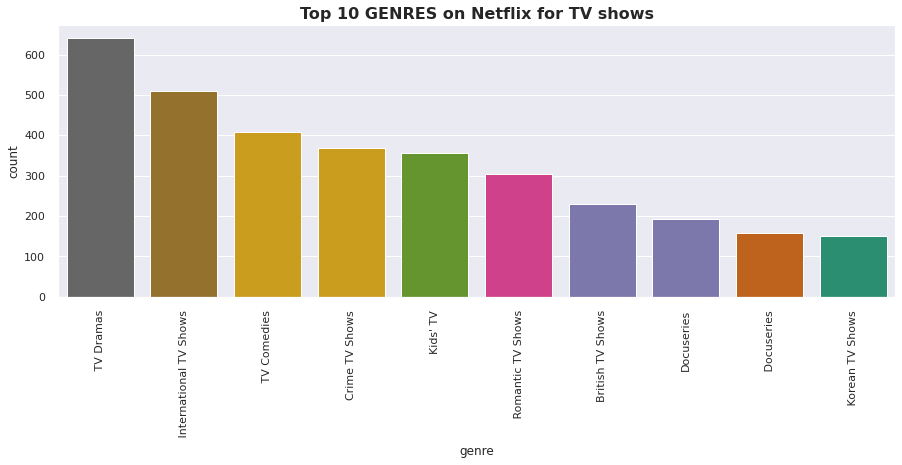

In [ ]:
#Top 10 genres for TV shows
genre_count = []
for i in tvshow_df['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

df_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genre',y='count',data=df_genre_count,palette="Dark2_r")
plt.title("Top 10 GENRES on Netflix for TV shows",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Drama is the most popular genre followed by International TV shows for movies

**YEAR-MONTH WISE ANALYSIS**

In [ ]:
#feature engineering
#getting date in the right format and year/month extraction
df ['date_added'] = pd.to_datetime(df['date_added'])
df ['year_added'] = df['date_added'].dt.year
df ['month_added'] = df['date_added'].dt.month

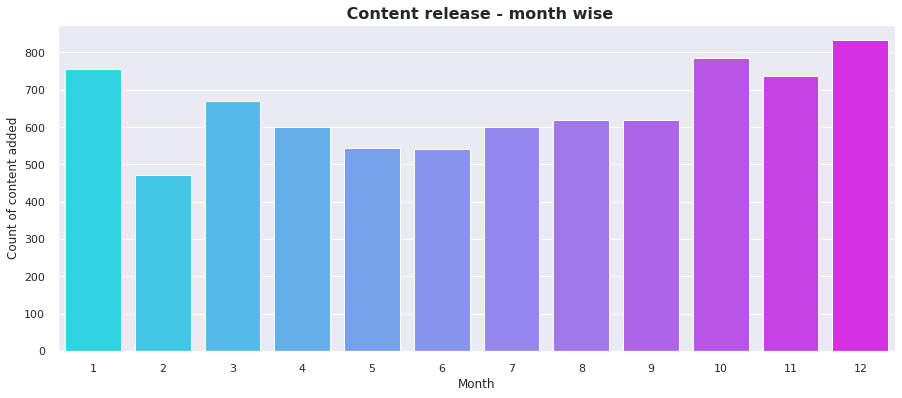

In [ ]:
#plot for month wise content release
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(x='month_added',data=df,palette="cool")

plt.title(' Content release - month wise',size='16',fontweight="bold")    
plt.xlabel('Month')
plt.ylabel('Count of content added')
plt.show()

More of the content is released in holiday season - October, November, December and January.

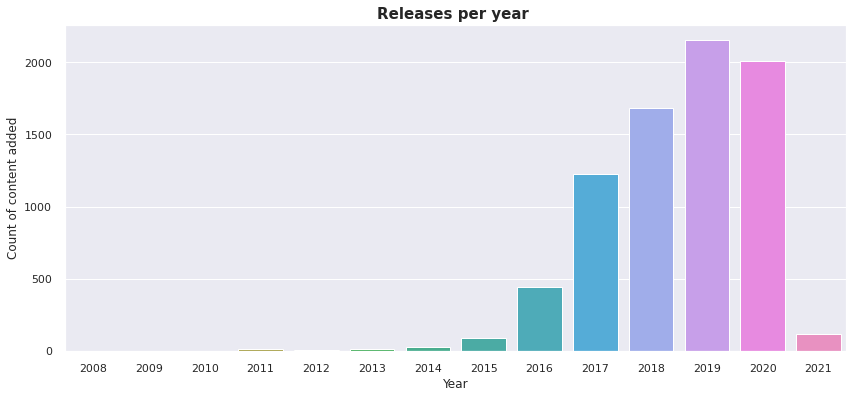

In [ ]:
#plot for year wise content release
sns.set(rc={'figure.figsize':(14,6)})
sns.countplot(x='year_added',data=df)

plt.title('Releases per year ',size='15',fontweight="bold")    
plt.xlabel('Year')
plt.ylabel('Count of content added')
plt.show()

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.

**HYPOTHESIS TESTING**

**Given**: In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

**HYPOTHESIS** - Number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


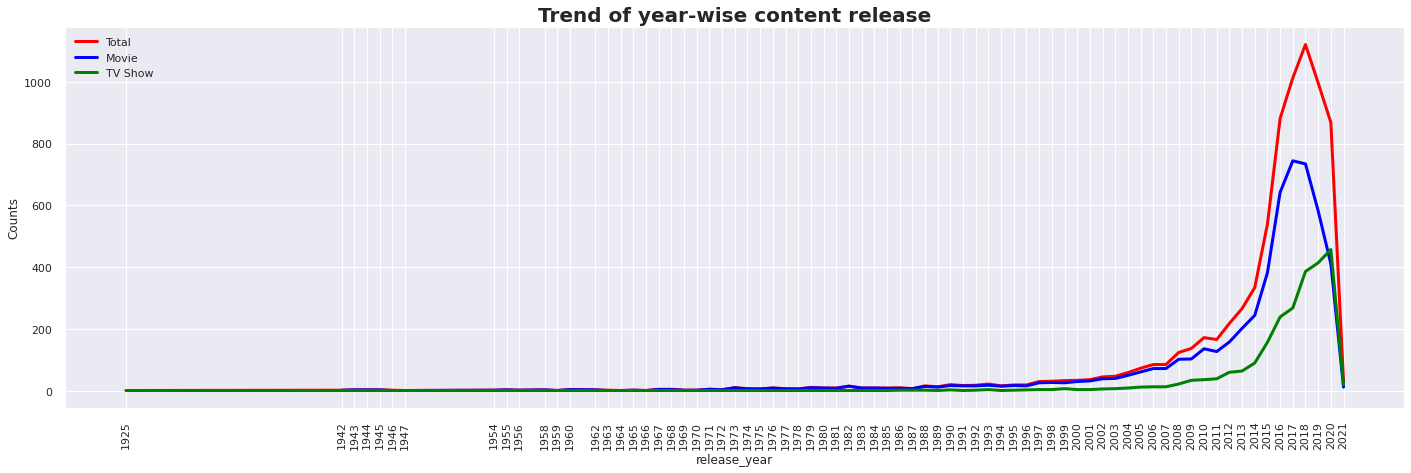

In [ ]:
#Visualize the growth of netflix industry over the years

year_data = df['release_year'].value_counts().sort_index().loc[:2021]
type_data = df.groupby('release_year')['type'].value_counts().unstack().loc[:2021]


plt.figure(figsize=(24,7))

sns.lineplot(x=year_data.index,y=year_data, color = 'red', linewidth=3, label='Total')
sns.lineplot(type_data.index, type_data['Movie'], color='blue', linewidth=3, label='Movie')
sns.lineplot(type_data.index, type_data['TV Show'], color='green', linewidth=3, label='TV Show')

plt.xticks(year_data.index.unique())
plt.title("Trend of year-wise content release", weight='bold', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.legend(loc='upper left')

In [ ]:
#Checking the trend between 2010 and 2018
df_2010 = df[df['year_added']>=2010]
df_2k10_18 = df[df['year_added']<=2018]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of content added')

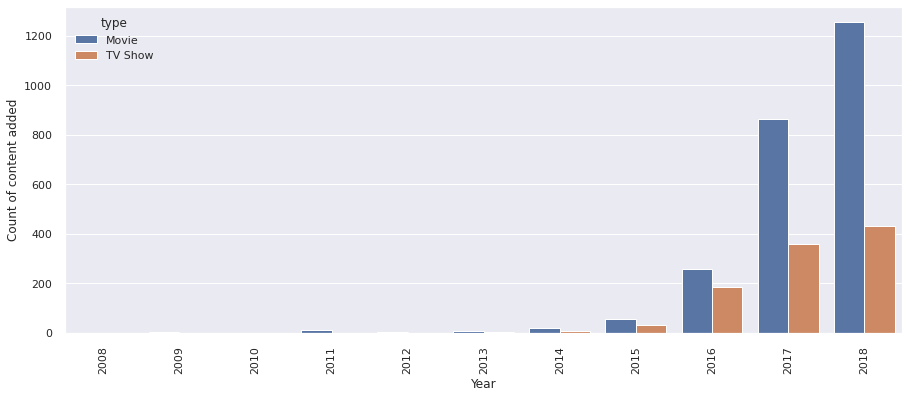

In [ ]:
#overall year_added analysis
plt.figure(figsize=(15,6))
sns.countplot(df_2k10_18["year_added"],hue=df_2k10_18["type"])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count of content added')

**RESULT**: Irrespective of the release years, There is no decline in the number of movies.Also number if movies added has always been more than the number of tv shows added. So with this information, we hereby reject our Hypothesis

**DATA PREPROCESSING**

We have made some changes in data just for EDA so we will start our clustering analysis with fresh data and do the manipulations again.

In [ ]:
#reading the data again
df = pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# Replacing the values where the director is null with appropriate strings
df["cast"] = df["cast"].fillna("")
df["country"] = df["country"].fillna("")
df["date_added"] = df["date_added"].fillna("")
df["rating"] = df["rating"].fillna("")
df["director"] = df["director"].fillna("")

In [ ]:
# Change cast, country, and listed_in columns from type str to lists
df.cast = df.cast.str.split(',').tolist()
df.country = df.country.str.split(',').tolist()
df.listed_in = df.listed_in.str.split(',').tolist()

In [ ]:
# Array of all cast members, countries, ratings, and genres

all_cast = df['cast'].explode().unique()
all_countries = df['country'].explode().unique()
all_ratings = df['rating'].unique()
all_genres = df['listed_in'].explode().unique()

len(all_cast), len(all_countries), len(all_ratings),len(all_genres)

(35373, 188, 15, 73)

Since number of Unique actors are more than our number of rows, it's not going to help much for our analysis, hence we will not use this feature. Director has 30% null values and will not be used by us.

In [ ]:
#combining the required features into one column
df['combined features'] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " "  + df['rating'].astype(str) + " "  + df['country'].astype(str)

In [ ]:
#data cleaning
import re
#removing URLs
df['combined features'] = df['combined features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))
#REMOVING PUNCTUATIONS/NUMBERS/SPECIAL CHARACTERS
df['combined features'] = df['combined features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))
#lower case
df['combined features'] = df['combined features'].apply(lambda x: x.lower())

**REMOVE STOPWORDS**

In [ ]:
#set stopwords
stop = set(stopwords.words('english'))

In [ ]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
#removing stopwords
df['combined features'] = df['combined features'].apply(lambda x: remove_stopwords(x))

**REMOVING SHORT WORDS**

In [ ]:
#Removing words with less than 2 letters
df['combined features'] = df['combined features'].apply(lambda x: (w for w in x if len(w)>2))

In [ ]:
#import libraries
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
#stemming
df['combined features'] = df['combined features'].apply(lambda x: stemming(x))

**VECTORIZATION**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
x = vectorizer.fit_transform(df["combined features"])

pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abduct,abil,aboard,absurd,abus,academi,accept,access,accid,...,young man,young men,young son,young woman,young women,younger,youth,zani,zealand,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**K-MEANS CLUSTERING**

In [ ]:
# importng libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

In [ ]:
#hperparameter tuning
clusters=[i for i in range(2,103,10)]
silhouette_avg = []
Sum_of_squared_distances = []

In [ ]:
# running kmeans
for num_clusters in clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 #fitting model
 kmeans.fit(x)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(x, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)

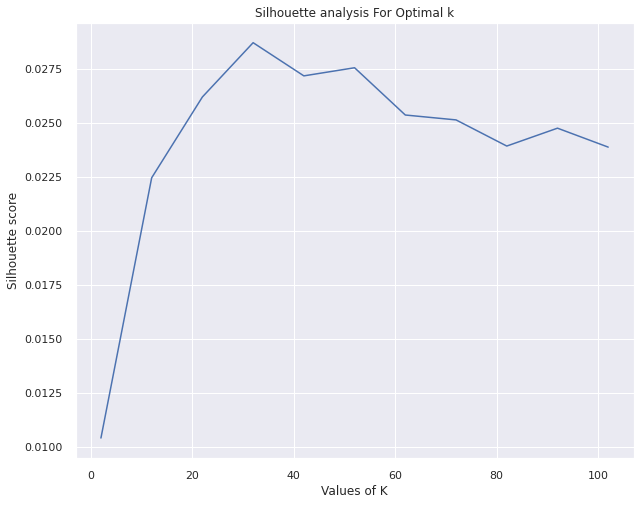

In [ ]:
# silhouette score
plt.figure(figsize=(10,8))
plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

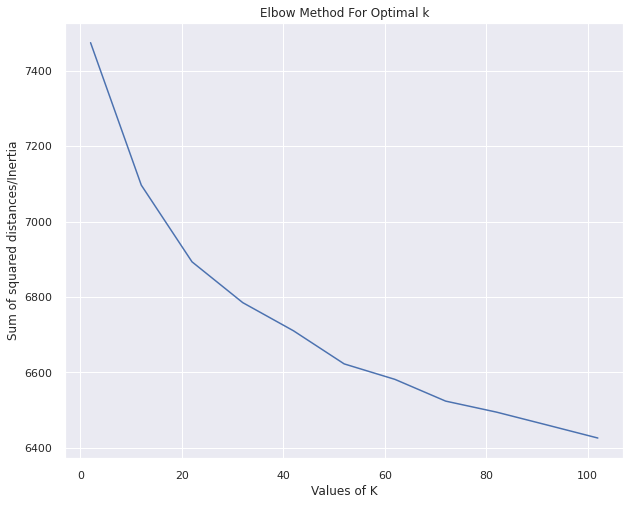

In [ ]:
# Elbow method
plt.figure(figsize=(10,8))
plt.plot(clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Based on Silhouette and elbow analysis we can see that the highest Silhouette score is before 30s and have 2 bends before 40s in elbow plot.

Now we have a basic idea of where the optimum number of clusters might lie. We'll run the K Means clustering analysis again this time from 2 to 40 and find the the best number of clusters.

In [ ]:
#hperparameter tuning
clusters=[i for i in range(2,41,1)]

In [ ]:
# running kmeans
silhouette_avg = []
Sum_of_squared_distances = []
for num_clusters in clusters:
 
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10)
 #fitting model
 kmeans.fit(x)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(x, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_)

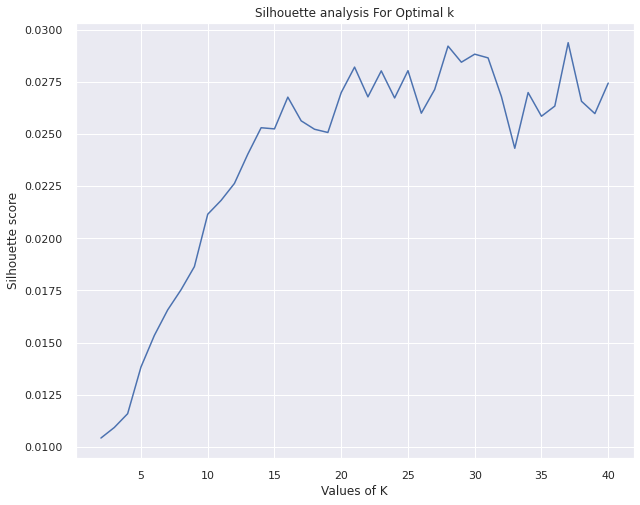

In [ ]:
# silhouette score
plt.figure(figsize=(10,8))
plt.plot(clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Maximum score is at k=22 and k=26 is also very close. we'll move onto to elbow analysis and try to find out the optimum value of k.

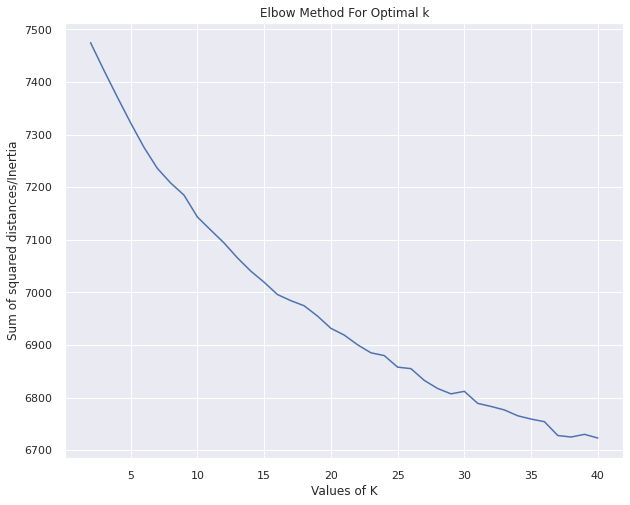

In [ ]:
# Elbow method
plt.figure(figsize=(10,8))
plt.plot(clusters,Sum_of_squared_distances,'bx-')

plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

Here we can see a slight deviation at 22 and a more visible deviation at 26, considering both the graphs, we'll go ahead with K=26.

**FINAL MODEL**

Creating our model for K=26

In [ ]:
# fitting model
kmeans = KMeans(n_clusters=26, init='k-means++', n_init=10)
kmeans.fit(x)


# prediction
predictions = kmeans.fit_predict(x)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

In [ ]:
# Attach cluster predictions to original data frame
df.insert(len(df.columns), column = 'cluster', value = predictions_df.cluster)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined features,cluster
0,s1,TV Show,3%,,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,intern show drama sci fantasi futur elit inhab...,10
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit mexico ...,21
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,14
3,s4,Movie,9,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi sci fantasi post...,10
4,s5,Movie,21,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,drama brilliant group student becom card count...,17


Let's try to see if our model worked well and if our clusters makes any sense by checking out some random clusters.

In [ ]:
df[df['cluster'] == 1][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
38,TV Show,แผนร้ายนายเจ้าเล่ห์,,"[Chutavuth Pattarakampol, Sheranut Yusananda,...",[],TV-14,"[International TV Shows, Romantic TV Shows, ...","When two brothers fall for two sisters, they q..."
51,TV Show,100 Days My Prince,,"[Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, ...",[South Korea],TV-14,"[International TV Shows, Romantic TV Shows, ...","Upon losing his memory, a crown prince encount..."
180,TV Show,A Good Wife,,"[Tien Hsin, Christopher Lee, Darren Chiu, S...",[Taiwan],TV-14,"[International TV Shows, Romantic TV Shows, ...",As her seemingly idyllic life begins to crumbl...
198,TV Show,A Little Thing Called First Love,,"[Lai Kuan-lin, Zhao Jinmai, Wang Runze, Cha...",[China],TV-G,"[International TV Shows, Romantic TV Shows, ...",A shy college student with a knack for drawing...
199,TV Show,A Love So Beautiful,,"[Kim Yo-han, So Joo-yeon, Yeo Hoi-hyun, Jeo...",[South Korea],TV-PG,"[International TV Shows, Romantic TV Shows, ...",Love is as tough as it is sweet for a lovestru...
...,...,...,...,...,...,...,...,...
7581,TV Show,When I See You Again,,"[Jasper Liu, Mandy Wei, Jet Chao, Ivy Shao,...",[Taiwan],TV-14,"[International TV Shows, Romantic TV Shows, ...","On a visit to his hometown, a rich bachelor se..."
7610,TV Show,Who's the One,,"[Tien Hsin, Weber Yang, Pink Yang, Johnny L...",[Taiwan],TV-14,"[International TV Shows, Romantic TV Shows, ...",A doctor performs plastic surgery on a fat man...
7733,TV Show,You're My Destiny,,"[Joe Chen, Ethan Juan, Baron Chen, Bianca B...",[Taiwan],TV-MA,"[International TV Shows, Romantic TV Shows, ...",A young woman's romantic cruise ends in a twis...
7743,TV Show,Yours Fatefully,,"[Kingone Wang, Jesseca Liu, Xiang Yun, Chen...",[Singapore],TV-14,"[International TV Shows, Romantic TV Shows, ...",Two lonely singles meet on a blind date and sl...


Cluster 1 has TV shows as type and genre is International TV shows.

In [ ]:
df[df['cluster'] ==4][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
34,Movie,#Roxy,Michael Kennedy,"[Jake Short, Sarah Fisher, Booboo Stewart, ...",[Canada],TV-14,"[Comedies, Romantic Movies]",A teenage hacker with a huge nose helps a cool...
111,TV Show,44 Cats,,"[Sarah Natochenny, Suzy Myers, Simona Berman...",[Italy],TV-Y7,[Kids' TV],Paw-esome tales abound when singing furry frie...
171,Movie,A Family Reunion Christmas,Robbie Countryman,"[Loretta Devine, Tia Mowry-Hardrict, Anthony...",[United States],TV-PG,[Movies],M'Dear and her sisters struggle to keep their ...
276,TV Show,Abby Hatcher,Kyran Kelly,"[Macy Drouin, Wyatt White, Paul Sun-Hyung Le...","[United States, Canada]",TV-Y,[Kids' TV],A big-hearted girl helps her Fuzzly friends wh...
364,TV Show,Akbar Birbal,,"[Kiku Sharda, Vishal Kotian, Delnaaz Irani]",[India],TV-G,"[Kids' TV, TV Comedies, TV Dramas]","From battles of wit to fights for justice, Emp..."
...,...,...,...,...,...,...,...,...
7717,TV Show,YOM,,"[Sairaj, Devyani Dagaonkar, Ketan Singh, Ma...",[],TV-Y7,[Kids' TV],"With the mind of a human being, and the body o..."
7756,TV Show,Z4,,"[Apollo Costa, Gabriel Santana, Matheus Lust...",[Brazil],TV-PG,[Kids' TV],Fading music biz veteran Zé realizes he has ju...
7759,TV Show,Zak Storm,,"[Michael Johnston, Jessica Gee-George, Chris...","[United States, France, South Korea, Indone...",TV-Y7,[Kids' TV],Teen surfer Zak Storm is mysteriously transpor...
7766,TV Show,Zig & Sharko,,[],[France],TV-Y7,"[Kids' TV, TV Comedies]","Zig, an island-bound hyena, will do anything t..."


Cluster 4 has content type movies and genre as children and family movies.

In [ ]:
df[df['cluster'] == 15][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
25,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",[],[United States],NR,[Documentaries],This real-life look at FBI counterterrorism op...
28,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","[Helen Mirren, Gengher Gatti]",[Italy],TV-14,"[Documentaries, International Movies]","Through her diary, Anne Frank's story is retol..."
30,Movie,#cats_the_mewvie,Michael Margolis,[],[Canada],TV-14,"[Documentaries, International Movies]",This pawesome documentary explores how our fel...
52,Movie,100 Days Of Solitude,,[],[Spain],TV-MA,"[Documentaries, International Movies]",Spanish photographer José Díaz spends 100 days...
56,Movie,100 Years: One Woman's Fight for Justice,Melinda Janko,[],[United States],TV-14,[Documentaries],This documentary chronicles Elouise Cobell's l...
...,...,...,...,...,...,...,...,...
7616,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",[],[United States],TV-PG,[Documentaries],This installment of Frank Capra's acclaimed do...
7633,Movie,Winnie,Pascale Lamche,[],"[France, Netherlands, South Africa, Finland]",TV-14,"[Documentaries, International Movies]",Winnie Mandela speaks about her extraordinary ...
7636,Movie,Winter on Fire: Ukraine's Fight for Freedom,Evgeny Afineevsky,[],"[United Kingdom, Ukraine, United States]",TV-MA,"[Documentaries, International Movies]","Over 93 days in Ukraine, what started as peace..."
7679,Movie,WWII: Report from the Aleutians,John Huston,[],[United States],TV-PG,[Documentaries],Filmmaker John Huston narrates this Oscar-nomi...


Cluster 15 is mixture of movies and Tv shows but Genre is comedy.

It looks like our model was able to bifurcate our content into based on it's different features.

# CONCLUSION



*   There are about 70% movies and 30% TV shows on Netflix.
*   The United States has the highest number of content on Netflix by a huge margin followed by India.

*   Raul Campos and Jan Sulter collectively have directed the most content on Netflix.
*   Anupam Kher has acted in the highest number of films on Netflix.

*   Drama is the most popular genre followed by comedy.
*   More of the content is released in holiday season - October, November, December and January.

*   The number of releases have significantly increased after 2015 and have dropped in 2021 because of Covid 19.
*   NULL HYPOTHESIS -The number of TV shows on Netflix have tripled and number of movies have reduced by 2000 between 2010 and 2018. (REJECTED)

*   The optimum number of clusters is 26.










